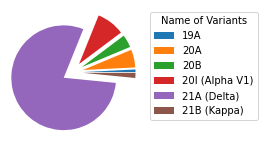

In [70]:
import matplotlib.pyplot as plt
import numpy as np

mylabels = ["19A", "20A", "20B", "20I (Alpha V1)", "21A (Delta)", "21B (Kappa)"]
y = np.array([1, 7, 5, 11, 101, 2])
myexplode = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

plt.figure(figsize=(7,7))
plt.pie(y, explode = myexplode)
plt.legend(title = "Name of Variants", labels = mylabels, bbox_to_anchor = (1.95, 1.0))

plt.tight_layout()
plt.savefig("piechart_variant.jpg", dpi = 300)
plt.show()


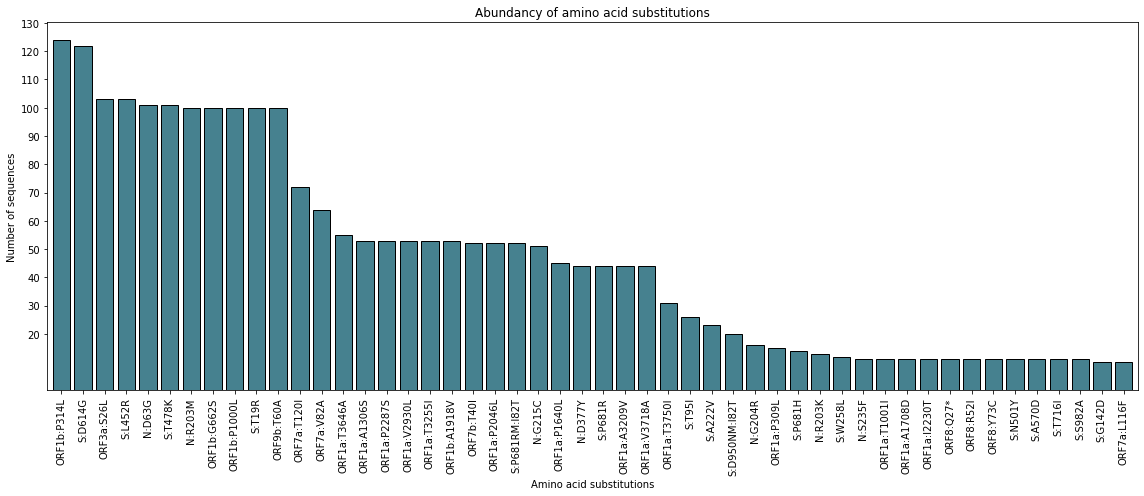

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("substitution_short.csv")

x = data.subs
y = data.number

plt.figure(figsize = (16,7))
plt.bar(x,y, color = "#46818f", ec="black")
plt.title("Abundancy of amino acid substitutions")
plt.xlabel("Amino acid substitutions")
plt.ylabel("Number of sequences")
plt.xticks(rotation = 90)
plt.yticks(np.arange(20,140,10))
plt.margins(x = 0.005)

plt.tight_layout()
plt.savefig("abundancy_of_substitution.jpg", dpi = 300)
plt.show()

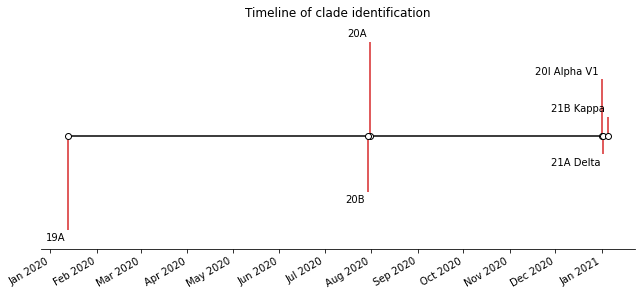

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import math
 
names = ["19A", "20A", "20B", "20I Alpha V1", "21A Delta", "21B Kappa"]
dates = ["2020-01-13", "2020-07-31", "2020-07-30", "2021-01-01", "2021-01-02", "2021-01-05"]
 
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
 
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

 
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)



ax.set(title="Timeline of clade identification")
markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
plt.setp(markerline, mec="k", mfc="w", zorder=3)
 
# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))
 
# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")
 
# format xaxis with 10 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
 
# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.1)

plt.savefig("timeline.png", dpi = 300)
plt.show()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("covid_data.csv")
df = pd.DataFrame(data, columns = ["location", "date", "new_cases", "new_deaths"])

country = df.loc[df["location"] == "Nepal"]

country.to_csv("covid_nepal.csv", index = False)

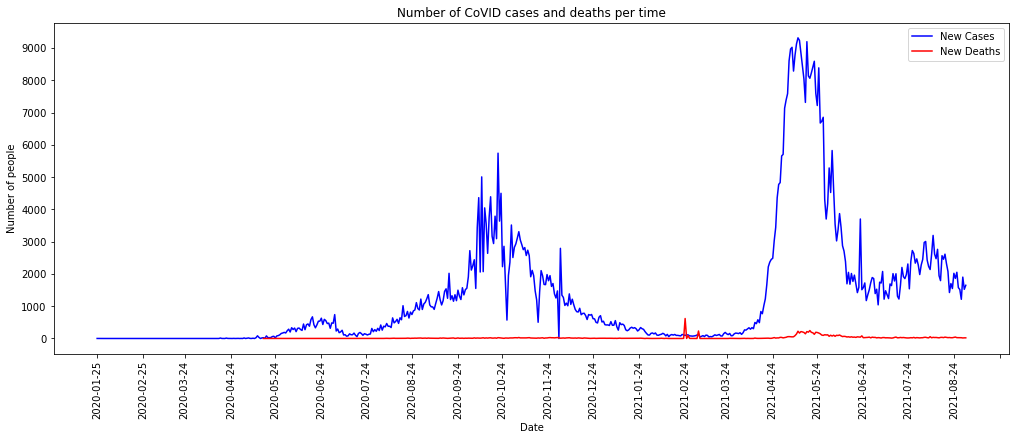

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

data = pd.read_csv("covid_nepal.csv")

fig, ax = plt.subplots(figsize = (14,6), constrained_layout = True)
ax.plot(data.date, data.new_cases, label = "New Cases", color = "blue")
ax.plot(data.date, data.new_deaths, label = "New Deaths", color = "red")

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
ax.set_yticks(np.arange(0,10000,1000))
plt.xticks(rotation = 90)
ax.legend()

ax.set_xlabel("Date")
ax.set_ylabel("Number of people")
ax.set_title("Number of CoVID cases and deaths per time")

plt.savefig("graph.png", dpi = 300)
plt.show()